<a href="https://colab.research.google.com/github/sjegede1/Dallas-Housing-Data-Project/blob/main/Data_Cleaning_and_Data_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Datasets
From my google drive


In [28]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [29]:
datasets = '/content/drive/MyDrive/Dallas County Property Info/Datasets/'

# Read Datasets


In [30]:
import pandas as pd
import numpy as np

In [31]:
account_info_raw = pd.read_csv(datasets+'ACCOUNT_INFO.CSV')
account_info_raw.head()
#Only picking the columns we need
account_info_columns = ['ACCOUNT_NUM','DIVISION_CD','STREET_NUM','FULL_STREET_NAME','BLDG-ID','UNIT_ID','PROPERTY_CITY','PROPERTY_ZIPCODE','NBHD_CD','DEED_TXFR_DATE','GIS_PARCEL_ID']
account_info = account_info_raw.filter(items=account_info_columns)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,13,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [32]:
res_detail_raw = pd.read_csv(datasets+'RES_DETAIL.CSV')
res_detail_raw.head()
#Only picking the columsn we need
res_detail_columns = ['ACCOUNT_NUM','TAX_OBJ_ID','BLDG_CLASS_DESC','YR_BUILT','EFF_YR_BUILT','CDU_RATING_DESC','TOT_MAIN_SF','TOT_LIVING_AREA_SF','PCT_COMPLETE','NUM_STORIES_DESC','NUM_KITCHENS','NUM_FULL_BATHS','NUM_HALF_BATHS','NUM_BEDROOMS','DEPREPRECIATION_PCT']
res_detail = res_detail_raw.filter(items=res_detail_columns)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Clean Data


In [33]:
test_columns = ['ACCOUNT_NUM', 'DIVISION_CD', 'STREET_NUM', 'FULL_STREET_NAME','UNIT_ID', 'PROPERTY_CITY', 'PROPERTY_ZIPCODE',
                'NBHD_CD','DEED_TXFR_DATE', 'BLDG_CLASS_DESC','YR_BUILT', 'EFF_YR_BUILT','CDU_RATING_DESC','TOT_LIVING_AREA_SF', 
                'PCT_COMPLETE','NUM_FULL_BATHS', 'NUM_HALF_BATHS', 'NUM_BEDROOMS']

### Inner join "ACCOUNT_INFO" wit "RES_DETAIL"

In [34]:
test = account_info.set_index('ACCOUNT_NUM').join(res_detail.set_index('ACCOUNT_NUM'),how='inner').reset_index().filter(items=test_columns)
test.UNIT_ID = test.UNIT_ID.fillna('')
test.STREET_NUM.astype(str,copy=False)
#test.STREET_NUM = test.STREET_NUM[test.STREET_NUM.notnull()]
test.drop(test[test.STREET_NUM.isnull()].index, inplace = True)
test.STREET_NUM = test.STREET_NUM.astype(int,copy=True)
test.STREET_NUM = test.STREET_NUM.astype(str,copy=True)

In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671259 entries, 0 to 671259
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ACCOUNT_NUM         671259 non-null  object 
 1   DIVISION_CD         671259 non-null  object 
 2   STREET_NUM          671259 non-null  object 
 3   FULL_STREET_NAME    671259 non-null  object 
 4   UNIT_ID             671259 non-null  object 
 5   PROPERTY_CITY       671259 non-null  object 
 6   PROPERTY_ZIPCODE    671259 non-null  object 
 7   NBHD_CD             671259 non-null  object 
 8   DEED_TXFR_DATE      635786 non-null  object 
 9   BLDG_CLASS_DESC     671259 non-null  object 
 10  YR_BUILT            671259 non-null  int64  
 11  EFF_YR_BUILT        671259 non-null  int64  
 12  CDU_RATING_DESC     671259 non-null  object 
 13  TOT_LIVING_AREA_SF  671259 non-null  int64  
 14  PCT_COMPLETE        671259 non-null  float64
 15  NUM_FULL_BATHS      671259 non-nul

Clean ZipCodes and Merge Full Address

In [36]:
test.PROPERTY_ZIPCODE = test.PROPERTY_ZIPCODE.str.slice_replace(start=5,repl='')

In [37]:
test['FULL ADDRESS'] = test.STREET_NUM + ' ' + test.FULL_STREET_NAME + ' ' + test.PROPERTY_CITY + ' ' + test.PROPERTY_ZIPCODE

In [38]:
test.head()

,ACCOUNT_NUM,DIVISION_CD,STREET_NUM,FULL_STREET_NAME,UNIT_ID,PROPERTY_CITY,PROPERTY_ZIPCODE,NBHD_CD,DEED_TXFR_DATE,BLDG_CLASS_DESC,YR_BUILT,EFF_YR_BUILT,CDU_RATING_DESC,TOT_LIVING_AREA_SF,PCT_COMPLETE,NUM_FULL_BATHS,NUM_HALF_BATHS,NUM_BEDROOMS,FULL ADDRESS
0,00000107512000000,RES,2707,FLORENCE ST,,DALLAS,75204,1DSZ99,07/18/2014,21,2016,2016,VERY GOOD,1656,100.0,2,0,2,2707 FLORENCE ST DALLAS 75204
1,00000107515000000,RES,600,CANTEGRAL ST,,DALLAS,75204,1DSZ99,12/23/2019,21,2000,2000,AVERAGE,3446,100.0,3,1,3,600 CANTEGRAL ST DALLAS 75204
2,00000107680100000,RES,1523,MARSEILLE PL,,DALLAS,75204,1DSQ01,11/03/2009,16,1980,1980,AVERAGE,2673,100.0,2,1,3,1523 MARSEILLE PL DALLAS 75204
3,00000107680120000,RES,1519,MARSEILLE PL,,DALLAS,75204,1DSQ01,08/28/2020,16,1980,1980,GOOD,1577,100.0,2,0,2,1519 MARSEILLE PL DALLAS 75204
4,00000107680140000,RES,1515,MARSEILLE PL,,DALLAS,75204,1DSQ01,03/18/2008,16,1980,1980,VERY GOOD,2345,100.0,2,0,2,1515 MARSEILLE PL DALLAS 75204


### Create Decades Bins for Year Built and Effective Year Built

In [39]:
year_labels = ['Pre-1950','1950s','1960s','1970s','1980s','1990s','2000s','2010s','2020s']
test['YR_BUILT_BINS'] = pd.cut(x=test.YR_BUILT, bins=[0,1950,1960,1970,1980,1990,2000,2010,2020,2030],labels=year_labels)
test['EFF_YR_BUILT_BINS'] = pd.cut(x=test.EFF_YR_BUILT, bins=[0,1950,1960,1970,1980,1990,2000,2010,2020,2030],labels=year_labels)
 
# We can check the frequency of each bin
print(test.head())

         ACCOUNT_NUM DIVISION_CD STREET_NUM FULL_STREET_NAME UNIT_ID  \
0  00000107512000000         RES       2707      FLORENCE ST           
1  00000107515000000         RES        600     CANTEGRAL ST           
2  00000107680100000         RES       1523     MARSEILLE PL           
3  00000107680120000         RES       1519     MARSEILLE PL           
4  00000107680140000         RES       1515     MARSEILLE PL           

  PROPERTY_CITY PROPERTY_ZIPCODE NBHD_CD DEED_TXFR_DATE BLDG_CLASS_DESC  ...  \
0        DALLAS            75204  1DSZ99     07/18/2014              21  ...   
1        DALLAS            75204  1DSZ99     12/23/2019              21  ...   
2        DALLAS            75204  1DSQ01     11/03/2009              16  ...   
3        DALLAS            75204  1DSQ01     08/28/2020              16  ...   
4        DALLAS            75204  1DSQ01     03/18/2008              16  ...   

   EFF_YR_BUILT  CDU_RATING_DESC TOT_LIVING_AREA_SF  PCT_COMPLETE  \
0          2016  

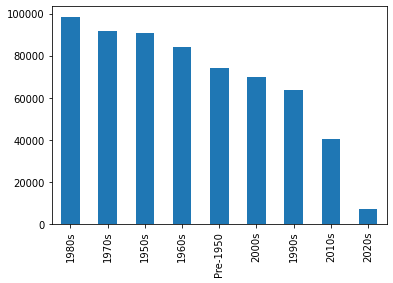

In [40]:
ax = test.EFF_YR_BUILT_BINS.value_counts().plot(kind='bar')

Convert Addresses to Longtiude and Latitude using Google maps API then add to test DataFrame

**DO NOT STORE API KEYS IN THE SCRIPT**

Output cleaned data to csv in Drive


In [41]:
filepath = datasets+'Residential_Data_Clean.csv'
test.to_csv(filepath,index=False)

Future Work
* Scrape History Data from dallascad.org
* Stream history data if possible
* Create distrbuted workload
* Transform data before storage if necessary
  * Store history data as documents
  * Design graph db or MongoDB for storage
  * Allow dynamic querying of data
* Store history
